This jupyter notebook uses LinearRegression to know relation between GDP and life satisfaction.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import os

#To format all numbers in same way
pd.options.display.float_format = '{:,.2f}'.format

In [28]:
bli=pd.read_csv("bli.csv",thousands=',')
bli = bli[bli["INEQUALITY"]=="TOT"]
bli = bli.pivot(index="Country", columns="Indicator", values="Value")
gdp=pd.read_csv("gdp.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp.set_index("Country", inplace=True)

In [29]:
gdp.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.99,"2,013.00"
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","3,995.38","2,010.00"
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,318.14","2,014.00"
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,100.31","2,014.00"
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","14,414.30","2,011.00"


In [30]:
country_stats=pd.merge(left=bli,right=gdp,left_index=True,right_index=True)
country_stats.sort_values(by="GDP per capita",inplace=True)

In [31]:
country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]
X=np.c_[country_stats["GDP per capita"]]
y=np.c_[country_stats["Life satisfaction"]]

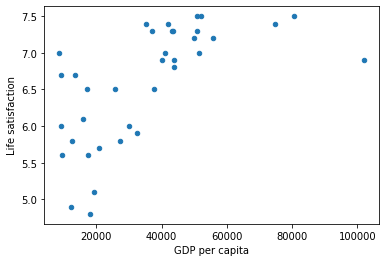

In [32]:
country_stats.plot(kind="scatter",x="GDP per capita",y="Life satisfaction")
plt.show()

In [33]:
model=sklearn.linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [34]:
X_new=[[23456]]
print(model.predict(X_new))

[[6.30667748]]
